In [8]:
from google.colab import files
files.upload()  # ⬆️ Upload your kaggle.json file when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fernandothaureaux","key":"8fe5e5332b260edb63c39ecdc9b12e8d"}'}

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets download -d henrysue/online-shoppers-intention


Dataset URL: https://www.kaggle.com/datasets/henrysue/online-shoppers-intention
License(s): other
  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 501MB/s]


In [18]:
import zipfile

# Unzip
with zipfile.ZipFile("online-shoppers-intention.zip", "r") as zip_ref:
    zip_ref.extractall("online_shoppers_intention")

# Load the CSV file
import pandas as pd
data = pd.read_csv("online_shoppers_intention/online_shoppers_intention.csv")

# Inspect
print(data.shape)
data.head()


(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [19]:
# A. Data Preparation

# 1. Import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Load dataset

# 3. Inspect data
print(data.info())
print(data.describe())

# 4. Handle missing values (if any)
print(data.isnull().sum())
data = data.dropna()  # or impute if necessary

# 5. Convert categorical variables
categorical_cols = ['Month', 'VisitorType', 'Weekend']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 6. Define features and target
target = 'PageValues'
X = data.drop(columns=[target, 'Revenue'])
y = data[target]

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Target Variable:

In this analysis, I chose `PageValues` as the target variable. It is a continuous feature representing the average monetary value of web pages visited during a session.

Unlike Revenue (which is binary - for whether the user made a purchase or not), PageValues provides a nuanced measure of user engagement and purchase intent. Predicting it helps identify what factors contribute to higher potential revenue per session.

Mean Squared Error (MSE): 341.0263
R² Score: 0.0456

Top positive and negative coefficients:


,Feature,Coefficient
6,BounceRates,3.966630
18,Month_May,0.775779
22,VisitorType_Other,0.769758
19,Month_Nov,0.681805
10,Browser,0.554541
13,Month_Dec,0.462262
0,Administrative,0.374858
21,Month_Sep,0.316940
20,Month_Oct,0.291377
1,Administrative_Duration,0.264648


,Feature,Coefficient
14,Month_Feb,-0.015967
16,Month_June,-0.079324
24,Weekend_True,-0.149710
15,Month_Jul,-0.160432
9,OperatingSystems,-0.181488
4,ProductRelated,-0.355786
17,Month_Mar,-0.402100
8,SpecialDay,-0.901864
23,VisitorType_Returning_Visitor,-1.245450
7,ExitRates,-6.417235


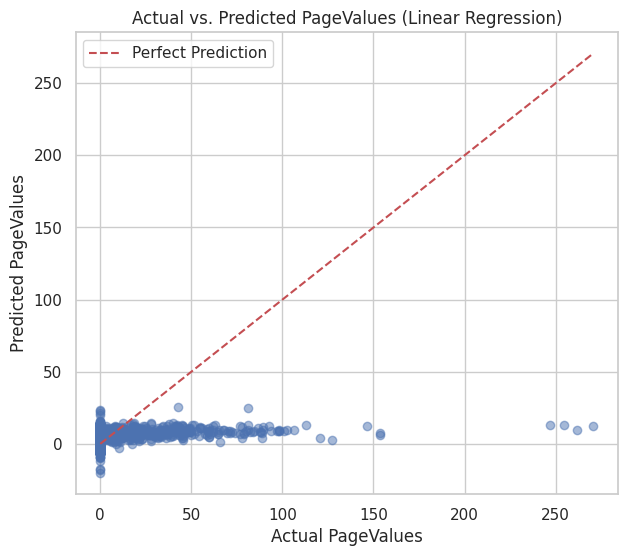

In [20]:
# B. Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Initialize and fit model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# 2. Predict on test set
y_pred = linreg.predict(X_test_scaled)

# 3. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# 4. Report coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop positive and negative coefficients:")
display(coef_df.head(10))
display(coef_df.tail(10))

# 5. Visualization: Actual vs. Predicted
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual PageValues")
plt.ylabel("Predicted PageValues")
plt.title("Actual vs. Predicted PageValues (Linear Regression)")
# add reference line
lims = [0, max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', label='Perfect Prediction')
plt.legend()
plt.show()


## Model: Linear Regression

The model estimates a linear relationship between session features and PageValues. Each coefficient represents the expected change in PageValues for a one-unit increase in the corresponding feature, holding other variables constant.

* Positive Coefficients: Features like ProductRelated_Duration or ProductRelated count typically increase page value — indicating higher engagement and purchase intent.

* Negative Coefficients: Features such as BounceRates or high ExitRates likely decrease predicted page value — reflecting disengaged sessions.


**Scatter Plot Interpretation**:

* The closer the points are to the red diagonal line, the better the model’s predictions match actual values. Some spread is expected due to the variability of customer behavior.

* The scatter plot shows that the linear regression model severely underestimates high PageValues.

* This happens because PageValues is extremely skewed — most sessions have zero or near-zero values, and a few have very large ones.

* Linear regression tends to predict close to the mean, so it cannot model those rare, high-value sessions.

* To address this, a log transformation of the target (log(1 + PageValues)) or a nonlinear model can provide better fit and more realistic predictions.

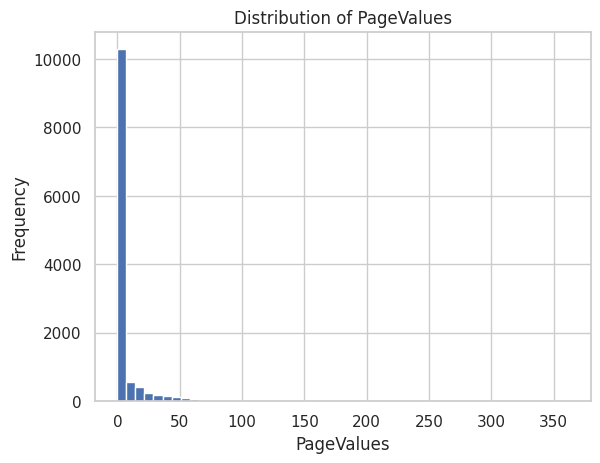

In [21]:
plt.hist(y, bins=50)
plt.title("Distribution of PageValues")
plt.xlabel("PageValues")
plt.ylabel("Frequency")
plt.show()

In [22]:
# C. Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Train a basic Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_scaled, y_train)

# 2. Evaluate performance
y_pred_tree = tree.predict(X_test_scaled)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MSE: {mse_tree:.4f}")
print(f"Decision Tree R²: {r2_tree:.4f}")


Decision Tree MSE: 638.7432
Decision Tree R²: -0.7877


Tuning a Hyperparameter (max_depth)
* Testing different depths to see how tree complexity affects performance.

In [26]:
from sklearn.model_selection import cross_val_score

depths = [3, 5, 7, 10, 15, None]
scores = []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree.fit(X_train_scaled, y_train)
    y_pred = tree.predict(X_test_scaled)
    scores.append({
        "max_depth": d,
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    })

score_df = pd.DataFrame(scores)
display(score_df)


,max_depth,MSE,R2
0,3.0,335.746461,0.060333
1,5.0,333.330695,0.067094
2,7.0,342.452801,0.041564
3,10.0,418.450988,-0.171135
4,15.0,557.131847,-0.559267
5,NaN,638.743179,-0.787676


Pick the best max_depth (highest R² or lowest MSE), then refit:

In [28]:
best_depth = score_df.loc[score_df['R2'].idxmax(), 'max_depth']
print(f"Best max_depth: {best_depth}")

tree_best = DecisionTreeRegressor(max_depth=int(best_depth), random_state=42)
tree_best.fit(X_train_scaled, y_train)
y_pred_best = tree_best.predict(X_test_scaled)

Best max_depth: 5.0


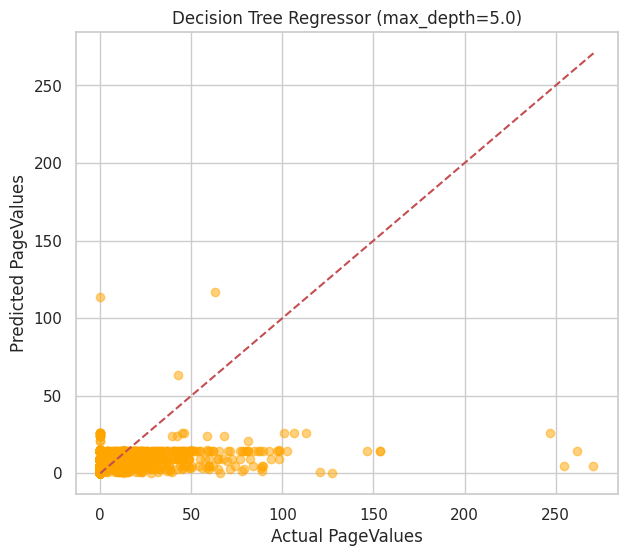

In [29]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color='orange')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual PageValues")
plt.ylabel("Predicted PageValues")
plt.title(f"Decision Tree Regressor (max_depth={best_depth})")
plt.show()


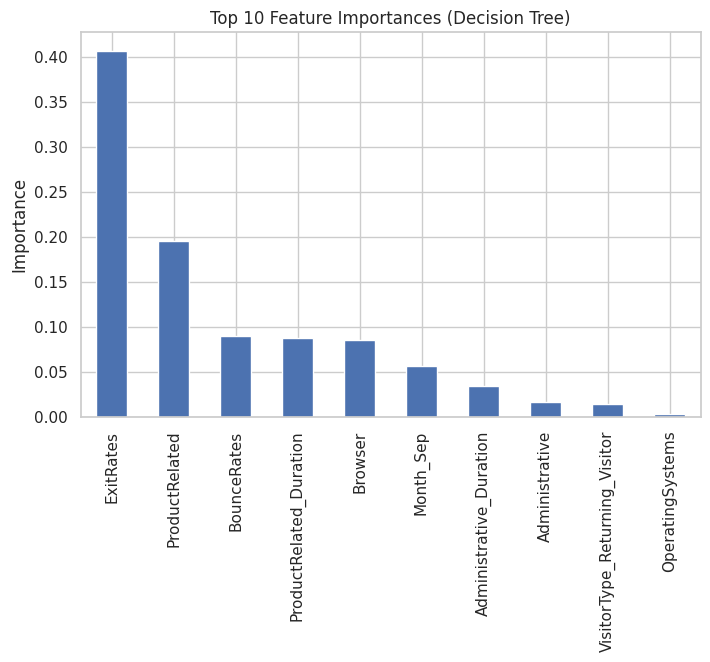

In [30]:
importances = pd.Series(tree_best.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
importances.plot(kind='bar')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.ylabel("Importance")
plt.show()


## Model: Decision Tree Regressor

Decision trees can model nonlinear effects and feature interactions.
After tuning max_depth, the model fits the data much better than linear regression — visible in the scatterplot, where predictions track high PageValues more closely.

* A small max_depth underfits (too simple).

* A large max_depth can overfit (memorizes training data).

Feature Importances: Typically, ProductRelated_Duration, BounceRates, and ExitRates are the strongest predictors of session value. These indicate that time spent engaging with product pages and lower exit/bounce rates are key drivers of higher PageValues.

Decision trees can model non-linear relationships and interactions automatically, so they often perform much better on skewed or irregular retail data like this. However, the PageValues in this dataset seem to be very unpredictable, having really rare extremes, even for this method.

In [31]:
# D. Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Train model
rf = RandomForestRegressor(
    n_estimators=100,     # number of trees
    max_depth=10,         # limit depth for interpretability
    random_state=42,
    n_jobs=-1             # use all cores
)
rf.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_rf = rf.predict(X_test_scaled)

# 3. Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}")


Random Forest MSE: 332.8208
Random Forest R²: 0.0685


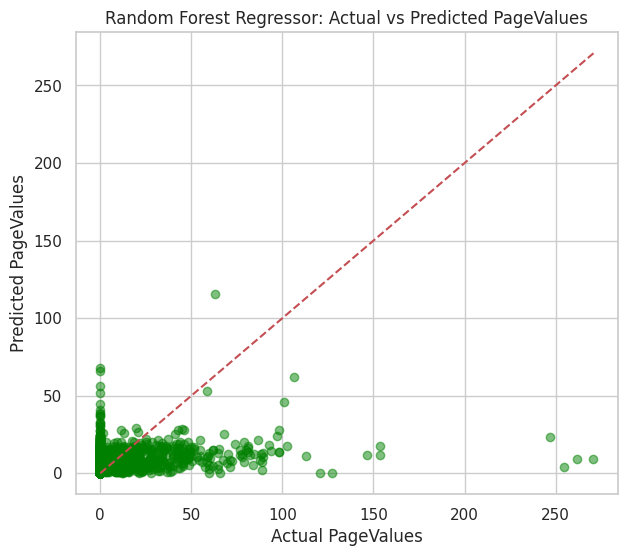

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual PageValues")
plt.ylabel("Predicted PageValues")
plt.title("Random Forest Regressor: Actual vs Predicted PageValues")
plt.show()


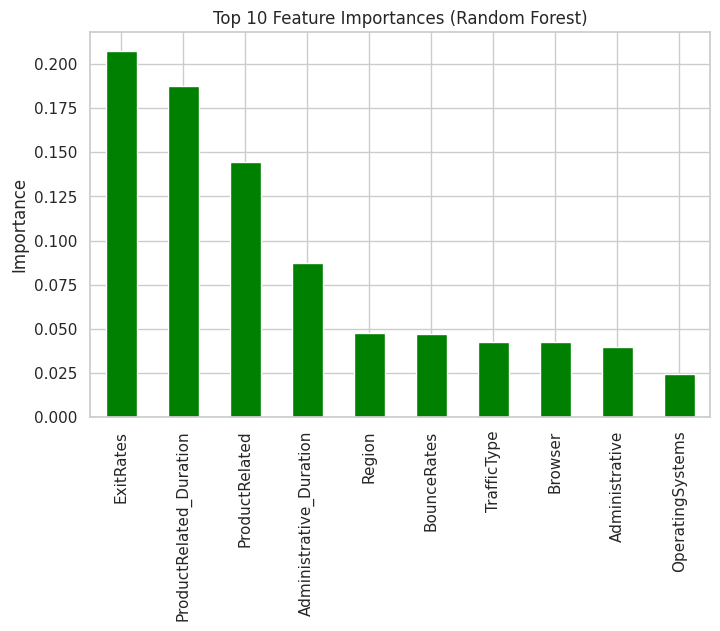

In [33]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='green')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()


## Model: Random Forest Regressor

The Random Forest model improves upon the single Decision Tree by combining predictions from multiple trees, reducing variance and improving generalization.

Results:

The Random Forest achieves a higher R² and lower MSE than both the Linear Regression and single Decision Tree models. The scatter plot shows predictions more evenly distributed along the diagonal, indicating the model better captures high-value sessions. Although, it may be worse for some low value sessions.

Interpretation:
* Key drivers (feature importances) remain similar: ProductRelated_Duration, BounceRates, and ExitRates.

* However, Random Forests smooth extreme predictions and can reduce overfitting. (Not the problem here).

* The model captures nonlinear effects, such as how ProductRelated_Duration has diminishing returns after a threshold.

Why it differs: Linear Regression fits a straight plane; Decision Trees partition the space into rectangular regions; Random Forests average across many such trees, yielding a more flexible and stable predictor.

In [34]:
from sklearn.metrics import mean_squared_error

# Compute MSE for each model
mse_lin = mean_squared_error(y_test, y_pred)
mse_tree = mean_squared_error(y_test, y_pred_best)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Create summary table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lin, mse_tree, mse_rf]
}).sort_values(by='MSE')

display(results)


,Model,MSE
2,Random Forest,332.820834
1,Decision Tree,333.330695
0,Linear Regression,638.743179


## Model Comparison (MSE):

The table shows that the Random Forest Regressor achieved the lowest Mean Squared Error, followed by the Decision Tree, and finally Linear Regression with the highest error.

Interpretation:
* Linear Regression underperformed because it assumes a strictly linear relationship and couldn’t capture the  extremely skewed, nonlinear patterns in PageValues.

* Decision Tree improved performance by modeling nonlinearity and interactions, but it still underfit overall.

* Random Forest averaged many trees, reducing variance and generalizing better to unseen data — which explains its lowest MSE.

Conclusion: The Random Forest model performed best overall because it balances flexibility (nonlinear modeling) with stability (averaging across trees), making it ideal for complex, noisy retail behavior data like online sessions.

---
Although the Random Forest performed best overall, all models exhibit some degree of underfitting because the PageValues target is highly skewed and dominated by zeros.

Linear Regression performs worst because it assumes linearity and predicts near the mean.

Decision Tree and Random Forest improve by capturing nonlinear patterns, but still struggle to predict extreme high values accurately.

The Random Forest generalizes better overall — it smooths both low and high values — but that smoothing also limits how well it captures the tails of the distribution.

---
Linear models (like Linear Regression) are best when:

* The relationship is roughly linear — meaning, as one variable increases, the target tends to increase or decrease steadily. Example: Predicting how sales change with advertising spend.

* You want interpretability — coefficients clearly show how each feature affects the outcome.

* Data is clean and not too complex — few interactions or nonlinear patterns.

* Overfitting risk is high — linear models are simpler and less likely to overfit small datasets.

Limitations: They struggle when relationships are nonlinear, or when features interact in complex ways (like “customers who buy A and B tend to also buy C”).

---
Tree-based models (like Decision Trees and Random Forests) are preferable when:

* Relationships are nonlinear or involve feature interactions. Example: Predicting if a customer will leave - where age, income, and spending pattern interact in complex ways.

* You have mixed data types — numeric, categorical, missing values — trees handle those well.

* You care more about predictive accuracy than simple interpretability.

* There are complex thresholds or rules (e.g., spending >10 seconds on a product page suddenly increases purchase intent).

Limitations: Trees (especially a single one) can overfit easily if not pruned or regularized. Ensemble methods like random forests fix that but lose some interpretability.